In [19]:
import cv2, numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Activation
from keras.layers.convolutional import Convolution2D
from sklearn.model_selection import train_test_split
import keras.utils as utils
import cv2
import keras
import io
import tensorflow.keras as tk

# 1. Fashion Item 구분

데이터 로드

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train, y_train), (x_test, y_test) = tk.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Dress')

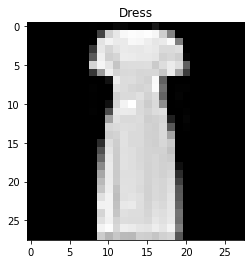

In [21]:
plt.imshow(x_train[50], cmap='gray')
plt.title(class_names[y_train[50]])

### 역행렬 기반 학습

In [22]:
x_train2 = x_train.reshape(-1, 28*28) # 1차원으로 변경
x_test2 = x_test.reshape(-1, 28*28) # 1차원으로 변경
y_h = np.eye(10)[y_train] # 원핫인코딩된 레이블로 변경
A = np.hstack([ x_train2, np.ones(( x_train2.shape[0], 1)) ]) # 인버스 문제를 풀기 위해 1 추가
print(A.shape)

(60000, 785)


In [23]:
print(A[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

In [24]:
%%time # 이 셀을 실행시키는데 얼마나 걸리는지 표시
inv = np.linalg.pinv(A) # 의사역행렬
W = np.matmul(inv, y_h) 
print(W.shape)

(785, 10)
CPU times: user 41.3 s, sys: 23.4 s, total: 1min 4s
Wall time: 6.4 s


In [25]:
print(W[:, 0])

[-4.27783879e+00  2.18779894e+00  6.14865874e-01  2.22933513e-01
 -1.99669963e-01  7.92164431e-03  4.47252312e-02 -4.51890493e-02
  3.35852981e-02  9.31265012e-03 -3.00427528e-02  1.70179029e-02
  8.70304109e-03 -4.22964755e-02  6.87816631e-03 -5.41385781e-02
  4.96363837e-02  9.63703211e-03  1.27794623e-03  4.81258206e-06
  8.50389417e-02 -1.03545034e-01 -9.15525296e-02 -2.55857823e-02
  5.97754460e-02 -2.53074402e-02 -8.70985786e-02  5.50080948e-02
  1.19402948e+00 -7.10763494e-01  4.47668530e-01  1.44735803e-01
 -1.32593727e-01 -5.62829022e-02 -1.40890879e-01  5.96154417e-03
 -3.41027899e-02 -4.51309484e-02 -2.01872401e-02  1.50024278e-02
 -1.35297137e-02  5.82126646e-03  2.89583085e-02 -8.01475695e-04
  4.07525259e-02  2.31823496e-02  6.48791126e-03 -1.72701934e-02
  5.41048857e-02  2.11283423e-02  2.14437556e-03 -3.33080947e-02
 -7.61885266e-02  4.69560036e-02 -9.21676604e-03  1.36799567e-01
  3.85299505e-01 -3.84830956e-02 -3.49207280e-01  1.07617081e-01
  4.70396214e-02  2.14099

In [26]:
A = np.hstack([ x_test2, np.ones(( x_test2.shape[0]  ,1))  ]) 
predict = np.matmul(A, W) # A와 W를 행렬곱
print(predict.shape)
label = np.argmax(predict, axis=1) # 10000개의 데이터에 대한 예측값
print(label)
np.mean(label == y_test) # 인식률

(10000, 10)
[9 2 1 ... 8 1 5]


0.8113

[ 0.00975466  0.05790015  0.40637147  0.07215669  0.39500298 -0.03531744
  0.17082703  0.01625435 -0.10816788  0.015218  ]
2


Text(0.5, 1.0, 'T:Coat  P:Pullover')

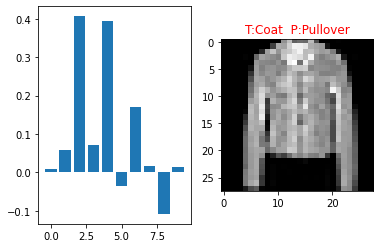

In [27]:
n = 10 # 10000 개 중 몇 번 째 데이터를 사용할 것인지

predict = np.matmul(A[n], W) # 10번째 데이터를 가지고 예측하겠다
print(predict) # 10개 클래스의 확률이 나온다

id = np.argmax(predict) # 가장 큰 인덱스
print(id)

plt.subplot(1,2,1) # 왼쪽에 그림을 그린다
plt.bar(range(0,10), predict) #

plt.subplot(1,2,2) # 오른쪽에 그림을 그린다
plt.imshow(x_test[n], cmap='gray') # 


col =  "blue" if  y_test[n] == id else "red" # 정답이면 파란색, 틀리면 빨간색으로 출력
plt.title(f"T:{class_names[y_test[n]]}  P:{class_names[id]}", color = col) # T는 정답, P는 예측값

### 신경망 기반 학습

In [29]:
model = Sequential() # Sequential 모델 사용 이전 출력을 다음 뉴런의 인풋으로 사용하는 모델
model.add(Dense(256, activation='relu')) # 첫번째 은닉층은 활성화함수로 relu, 256개의 노드로 구성
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # 출력층, softmax함수로 실제 분류할 클래스의 갯수 10개와 동일해야함
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # sparse_를 통해 일반 레이블 데이터를 통해 학습한다고 지정

In [30]:
%%time
hist = model.fit(x_train2, y_train, epochs = 10, batch_size=100) # 10번 학습

2021-11-14 16:24:09.928428: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.5021 - accuracy: 0.8229
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3656 - accuracy: 0.8672
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3270 - accuracy: 0.8801
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3033 - accuracy: 0.8889
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2854 - accuracy: 0.8946
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2693 - accuracy: 0.9001
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2574 - accuracy: 0.9044
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2462 - accuracy: 0.9079
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2321 - accuracy: 0.9124
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2263 - accuracy: 0.9142

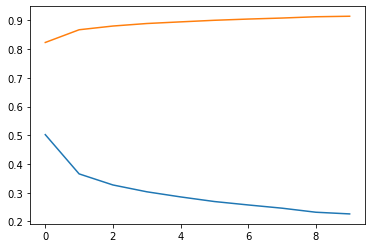

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

In [32]:
model.evaluate(x_test2, y_test) #

313/313 [==============================] - 0s 886us/step - loss: 0.3296 - accuracy: 0.8848


[0.3295629024505615, 0.8848000168800354]

### CNN 기반 학습

In [33]:
x_train3 = x_train.reshape(-1,28,28,1) # CNN은 4차원 데이터로 인풋을 넣어줘야한다. 
x_test3 = x_test.reshape(-1,28,28,1) # 첫번째는 샘플 수, 마지막은 1이나 3이 들어가는데 이미지의 경우 컬러인 경우 3, 흑백인 경우 1 삽입

In [34]:
model = Sequential()

# Convolution2D와 MaxPooling2D 레이어 사용
# 32개의 필터, 필터 커널의 크기는 3, 3 
# 패딩은 3,3을 쓰기 떄문에 실외각에 있는 픽셀은 계산이 안됨, same을 주면 제로패딩을 하겠다. -> Convolution2D이후에도 이미지의 크기가 줄어들지 않는다.
# 28,28,1의 형태로 input_shape을 주겠다
model.add(Convolution2D(32, (3, 3), padding='same', 
                 input_shape=x_train3.shape[1:]))
# 관행상 Convolution 이후에는 활성화함수를 거친다.
model.add(Activation('relu'))
# 영상의 크기를 두 배로 줄이는 역할을 한다.
model.add(MaxPooling2D(pool_size=(2, 2)))


# 이 과정을 한번 더 수행
# 보통 CNN에서 반복 시 필터의 갯수를 늘려가는 방식 사용
# -> 이전에 MaxPooling2D으로 영상의 크기를 반으로 줄이기 떄문에 줄이는 만큼 필터의 개수를 늘려줘야 데이터의 손실을 그나마 막을 수 있음
model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
# 만약 사이즈를 3,3으로 줬다면 3분의 1로 줄었을 것
model.add(MaxPooling2D(pool_size=(2, 2)))

# 추출된 특징을 가지고 DNN으로 구성하는 부분

# Flatten을 넣어 2차원의 필터들의 목록을 1차원으로 변경
model.add(Flatten())
# 레이어는 256개
model.add(Dense(256))
# 활성화 함수는 relu
model.add(Activation('relu'))

# 출력층 구성
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',     optimizer="adam",      metrics=['accuracy'])
# 구조 보기
model.summary()

# 레이어의 이름은 중요하지 않고 아우풋 쉐입이 무엇이냐가 중요
# 첫번째 층의 필터 개수는 32개, 출력값은 4차원 데이터
# 필터의 개수가 32개여서 최종 파라미터의 개수는 320개
# 필터 하나당 10개의 파라미터

# max_pooling 단계에서는 필터의 수는 그대로 두고 영상의 사이즈만 반으로 줄임

# conv 하면서 필터의 개수를 64개로 늘림

# flatten을 통해 1차원으로 변경

# 최종적으로 CNN 네트워크를 구성하는 필요한 파라미터는 총 824,458

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)             

In [35]:
%%time
# x_train3는 4차원 데이터
hist = model.fit(x_train3, y_train, epochs = 3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 15s 24ms/step - loss: 0.4463 - accuracy: 0.8394
Epoch 2/3
600/600 [==============================] - 14s 23ms/step - loss: 0.2878 - accuracy: 0.8945
Epoch 3/3
600/600 [==============================] - 14s 23ms/step - loss: 0.2438 - accuracy: 0.9112
CPU times: user 5min 56s, sys: 16.4 s, total: 6min 12s
Wall time: 42.1 s


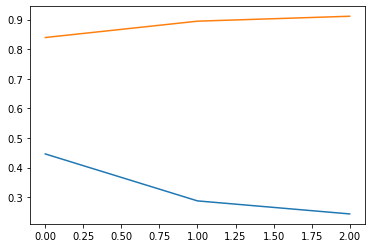

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

In [37]:
model.evaluate(x_test3, y_test) # 테스트 데이터에 대한 인식률 90퍼

313/313 [==============================] - 1s 3ms/step - loss: 0.2593 - accuracy: 0.9038


[0.259305477142334, 0.9038000106811523]

###  Deep CNN

CNN은 네트워크를 깊게 설정해야만 효과적으로 특징 추출 가능

In [38]:
model = Sequential()

# Convolution를 4번 수행
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=x_train3.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
# 이전엔 256개를 잡았는데 이번엔 128개만으로 충분한 이유는
# Deep CNN 하다보니 flatten_1가 64개이기 때문에 128개로 충분
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',     optimizer="adam",      metrics=['accuracy'])
model.summary()

# 층이 깊어질수록 파라미터의 개수가 줄어들게 됨

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)         

In [39]:
%%time
hist = model.fit(x_train3, y_train, epochs = 3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 17s 27ms/step - loss: 0.5944 - accuracy: 0.7816
Epoch 2/3
600/600 [==============================] - 16s 27ms/step - loss: 0.3405 - accuracy: 0.8770
Epoch 3/3
600/600 [==============================] - 16s 27ms/step - loss: 0.2885 - accuracy: 0.8945
CPU times: user 7min 11s, sys: 16.8 s, total: 7min 28s
Wall time: 49.2 s


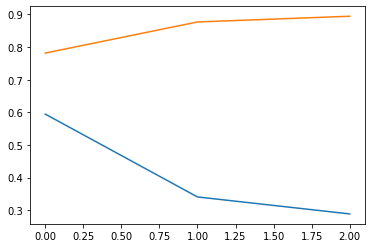

In [40]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

In [41]:
model.evaluate(x_test3, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2861 - accuracy: 0.8950


[0.28609195351600647, 0.8949999809265137]

### 상의, 하의, 신발, 가방 분류하기

레이블을 변경해10개의 클래스로 구분되어 있는 것을 상의하의신발가방 해서 4개의 클래스로 변경해 인식시켜보겠다

In [42]:
# 배열에서 특정 값을 뽑아내는 예시
a = np.array([1,2,3,3,4,5,6,6])
idx = np.where(a == 3) # array에서 특정 값을 검색하는 메서드
print(idx)
print(idx[0]) # [0]을 넣어 

(array([2, 3]),)
[2 3]


In [43]:
idx = np.where(a > 3) # 이렇게도 가능
print(idx[0])

[4 5 6 7]


In [44]:
b = np.zeros(a.shape)
print(b)
b[np.where(a == 3)[0]] = 1   # b[[2,3]] = 1 # a가 3인 부분은 1로 변경
b[np.where(a == 6)[0]] = 2 # a가 6인 부분은 2로 변경하는 예시
print(b)

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 0. 0. 2. 2.]


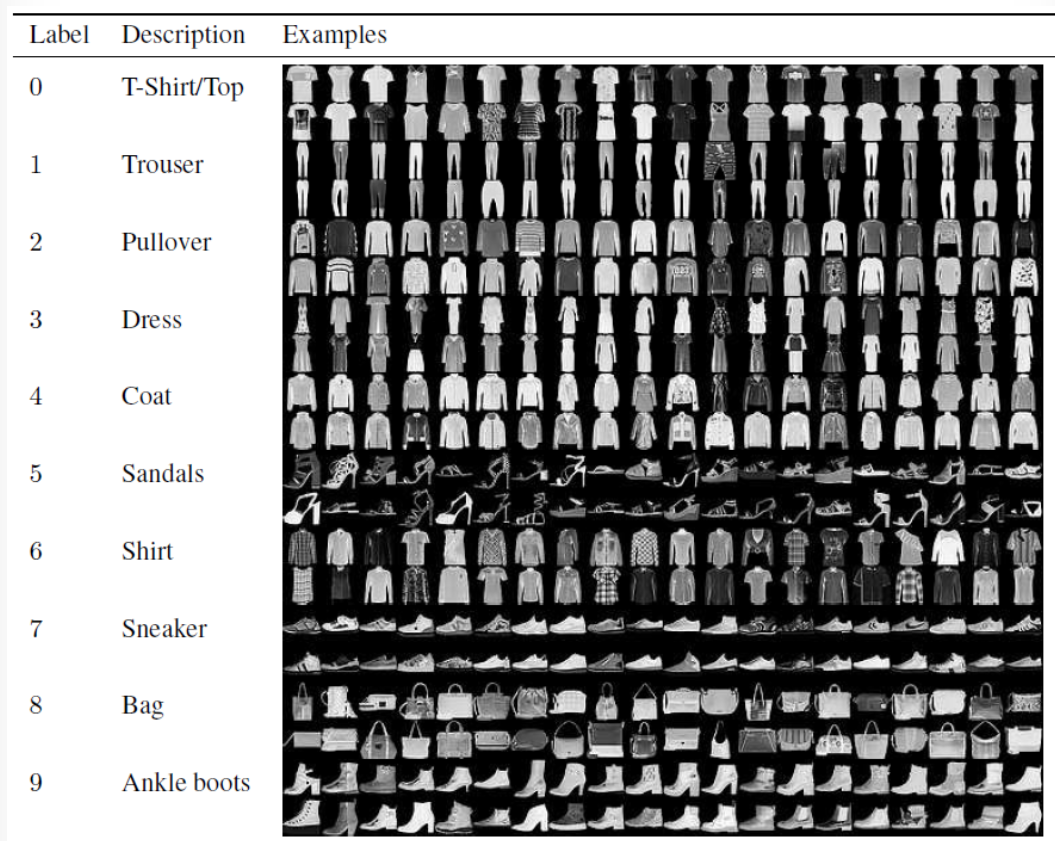

In [45]:
# 0부터 9까지 레이블 된 것을 상의, 하의, 신발, 가방으로 구분해 y_train_4, y_test_4 구성
y_train_4 = np.zeros(y_train.shape)
y_train_4[  np.where(y_train == 1)[0]] = 1 # 상의이니 1
y_train_4[  np.where(y_train == 5)[0]] = 2 # 하의 2
y_train_4[  np.where(y_train == 7)[0]] = 2 # 하의
y_train_4[  np.where(y_train == 9)[0]] = 2 # 하의
y_train_4[  np.where(y_train == 8)[0]] = 3 # 가방이니 3

y_test_4 = np.zeros(y_test.shape)
y_test_4[  np.where(y_test == 1)[0]] = 1
y_test_4[  np.where(y_test == 5)[0]] = 2
y_test_4[  np.where(y_test == 7)[0]] = 2
y_test_4[  np.where(y_test == 9)[0]] = 2
y_test_4[  np.where(y_test == 8)[0]] = 3

In [46]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=x_train3.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(4)) # 구분 클래스가 4개 이므로 4로 수정
model.add(Activation('softmax'))
                     
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [47]:
%%time
hist = model.fit(x_train3, y_train_4, epochs = 3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 14s 23ms/step - loss: 0.0658 - accuracy: 0.9800
Epoch 2/3
600/600 [==============================] - 13s 22ms/step - loss: 0.0255 - accuracy: 0.9920
Epoch 3/3
600/600 [==============================] - 13s 22ms/step - loss: 0.0170 - accuracy: 0.9947
CPU times: user 5min 49s, sys: 15 s, total: 6min 4s
Wall time: 40.8 s


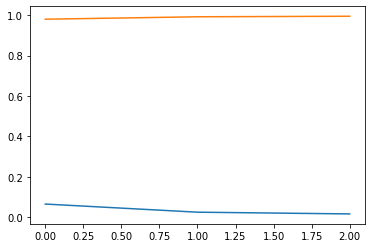

In [48]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

In [50]:
model.evaluate(x_test3, y_test_4)

313/313 [==============================] - 1s 3ms/step - loss: 0.0200 - accuracy: 0.9939


[0.020046185702085495, 0.9939000010490417]

# 2. ORL Face Recognition

In [51]:
orl = fetch_olivetti_faces()
data = orl.data   # 0~1로 정규화 되어 있음.
target = orl.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/ssongkim/scikit_learn_data


In [52]:
print(data.shape)
print(target.shape)
# 40명에 대해서 한 사람당 10장씩 데이터가 있음

(400, 4096)
(400,)


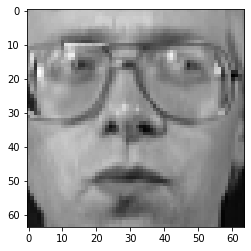

In [53]:
d = data[12]
plt.imshow(d.reshape(64,64), cmap='gray')

In [54]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size = 0.2)
X_train = X_train.reshape(-1, 64, 64, 1) 
X_val = X_val.reshape(-1, 64, 64, 1) 

In [55]:
input_shape = (64, 64, 1)

model = Sequential()
model.add(Convolution2D(16, kernel_size=(3, 3),
                     activation='relu',input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3),
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))    # 512, 1024도 충분
model.add(Dense(40, activation='softmax'))

model.summary()
model.compile(loss='sparse_categorical_crossentropy',        optimizer='adam',     metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               3211776   
_________________________________________________________________
dense_13 (Dense)             (None, 40)               

In [56]:
history = model.fit(X_train, y_train , batch_size=20,   epochs= 5, verbose=2,   validation_data=(X_val, y_val ))

Epoch 1/5
16/16 - 1s - loss: 3.8501 - accuracy: 0.0250 - val_loss: 3.7143 - val_accuracy: 0.0125
Epoch 2/5
16/16 - 0s - loss: 3.6602 - accuracy: 0.0625 - val_loss: 3.6849 - val_accuracy: 0.0375
Epoch 3/5
16/16 - 0s - loss: 3.5774 - accuracy: 0.1406 - val_loss: 3.6333 - val_accuracy: 0.1375
Epoch 4/5
16/16 - 0s - loss: 3.3727 - accuracy: 0.2688 - val_loss: 3.3812 - val_accuracy: 0.2875
Epoch 5/5
16/16 - 0s - loss: 2.8310 - accuracy: 0.4531 - val_loss: 3.0138 - val_accuracy: 0.2625


# 3. 한글 인식

- https://github.com/MijeongJeon/KoreanClassification_Keras_Coreml

In [58]:
r = 0.2
X = np.load('X-h.npy')    # 0 ~ 255, 배경:255,  글자색 0
y = np.load('y-h.npy')

print(X.shape)
print(y.shape)

(46060, 32, 32, 3)
(46060,)


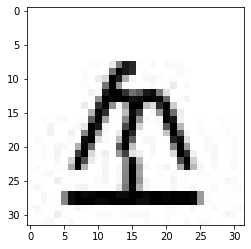

In [59]:
plt.imshow( X[33             ])

In [60]:
# 테스트셋은 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = r)

print("X_data:", X.shape)
print("y_labels:", y.shape)
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)

X_data: (46060, 32, 32, 3)
y_labels: (46060,)
X_train: (36848, 32, 32, 3)
X_val: (9212, 32, 32, 3)
y_train: (36848,)
y_val: (9212,)


In [61]:
# 컬러가 아닌 흑백으로 충분하기 때문에 3개 채널 중 0번째 채널만 사용하겠다
X_train = X_train[:,:,:,0]
X_val = X_val[:,:,:,0]

print(X_train.shape)

(36848, 32, 32)


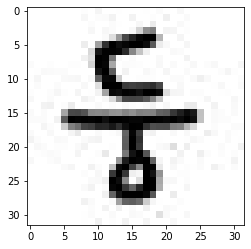

In [62]:
plt.imshow(X_train[0], cmap='gray')

In [63]:
X_train = X_train.reshape(-1,32,32,1) / 255.0 # 0에서 1사이로 정규화
X_val = X_val.reshape(-1,32,32,1) / 255.0

In [64]:
print("X_data:", X.shape)
print("y_labels:", y.shape)
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)

X_data: (46060, 32, 32, 3)
y_labels: (46060,)
X_train: (36848, 32, 32, 1)
X_val: (9212, 32, 32, 1)
y_train: (36848,)
y_val: (9212,)


### 역행렬 기반 학습

In [65]:
X_train2 = X_train.reshape(-1, 32*32) # 1차원으로 변경 
X_val2 = X_val.reshape(-1, 32*32)

y_h = np.eye(980)[y_train] # 클래스 수가 980

A = np.hstack([ X_train2, np.ones(( X_train2.shape[0]  ,1))  ]) 
print(A.shape)
# 전체 샘플 36000개, 영상 크기 32 * 32 + 1

(36848, 1025)


In [66]:
%%time
inv = np.linalg.pinv(A)
W = np.matmul(inv, y_h) 
print(W.shape)

(1025, 980)
CPU times: user 37.3 s, sys: 22.8 s, total: 1min
Wall time: 5.9 s


In [67]:
A = np.hstack([ X_val2, np.ones(( X_val.shape[0]  ,1))  ]) 
o = np.matmul(A, W)
print(o.shape)
p = np.argmax(o, axis=1)
np.mean(p == y_val)

# 테스트 데이터 개수 9212 클래스 980개
# 인식률이 8퍼넹??

(9212, 980)


0.08651758575770734

### CNN 기반 학습

In [68]:
model = Sequential()

#Convolution후 MaxPooling을 해줬었는데 이렇게 하기도 한다
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(980))
model.add(Activation('softmax'))

                    
model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

In [69]:
%%time
hist = model.fit(X_train, y_train, epochs =10, batch_size=100)

Epoch 1/10
369/369 [==============================] - 33s 89ms/step - loss: 5.1259 - accuracy: 0.0954
Epoch 2/10
369/369 [==============================] - 33s 89ms/step - loss: 1.5942 - accuracy: 0.5406
Epoch 3/10
369/369 [==============================] - 33s 89ms/step - loss: 0.6231 - accuracy: 0.8031
Epoch 4/10
369/369 [==============================] - 32s 88ms/step - loss: 0.2930 - accuracy: 0.9051
Epoch 5/10
369/369 [==============================] - 33s 89ms/step - loss: 0.1575 - accuracy: 0.9481
Epoch 6/10
369/369 [==============================] - 34s 92ms/step - loss: 0.0981 - accuracy: 0.9679
Epoch 7/10
369/369 [==============================] - 33s 90ms/step - loss: 0.0701 - accuracy: 0.9780
Epoch 8/10
369/369 [==============================] - 33s 90ms/step - loss: 0.0509 - accuracy: 0.9834
Epoch 9/10
369/369 [==============================] - 33s 89ms/step - loss: 0.0394 - accuracy: 0.9874
Epoch 10/10
369/369 [==============================] - 33s 90ms/step - loss: 0.033

In [70]:
 model.evaluate(X_val, y_val)

288/288 [==============================] - 2s 7ms/step - loss: 0.4679 - accuracy: 0.9025


[0.4678564965724945, 0.9025184512138367]

### OpenCV 연동

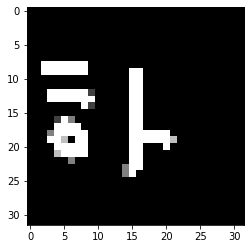

래


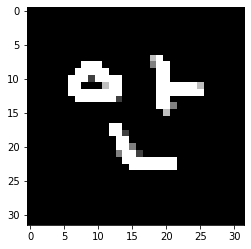

악


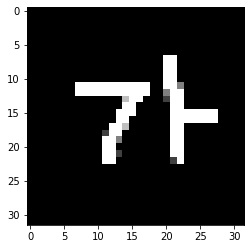

가


In [73]:
labels_file = io.open("label.txt", 'r', encoding='utf-8').read().splitlines()

    
ix,iy = -1,-1
drawing = False
img = np.zeros((256,256), np.uint8)

def draw(event,x,y,flags,param):
    global ix,iy,drawing, img

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y        
        
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img,(ix,iy),(x,y),(255,255,255),15)
            ix = x
            iy = y             
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False    
        
        
cv2.imshow('image',img)
cv2.setMouseCallback('image',draw)          


while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1)
    
    if k == 32 :
        img2 = cv2.resize(img, (32, 32), interpolation = cv2.INTER_LINEAR)
        plt.imshow(img2, cmap='gray')
        plt.show()        
        
        img2 = 1 - img2.reshape(1,32,32,1) / 255
        id = np.argmax(model.predict(img2))
        print(labels_file[id])
        img = np.zeros((256,256), np.uint8)           
        
        
    elif k == 27:
        break

cv2.destroyAllWindows()  